## 데이터 준비하기

In [41]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

2.6.0
60000


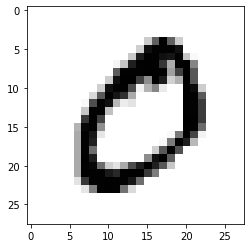

In [42]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [43]:
print(y_train[1])

0


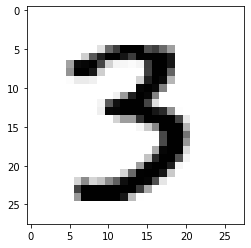

10001 번째 이미지의 숫자는 바로 3 입니다.


In [44]:
## index에 0에서 59999 사이 숫자를 지정하면 된다.
index = 10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print((index+1), "번째 이미지의 숫자는 바로" , y_train[index], "입니다.")

In [45]:
print(x_train.shape)

(60000, 28, 28)


In [46]:
print(x_test.shape)

(10000, 28, 28)


In [47]:
print("최솟값:" , np.min(x_train), "최댓값:", np.max(x_train))

최솟값: 0 최댓값: 255


In [48]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [49]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [51]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [52]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1788 - accuracy: 0.9453
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0462 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0368 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0299 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0253 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0155 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

In [53]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0326 - accuracy: 0.9913
test_loss: 0.03264719992876053 
test_accuracy: 0.9912999868392944


In [54]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.1088521e-09 3.8344303e-11 8.8001947e-08 1.0612566e-08 1.3606694e-09
 3.1355696e-11 3.1418551e-15 9.9999988e-01 2.3205884e-09 1.4272924e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


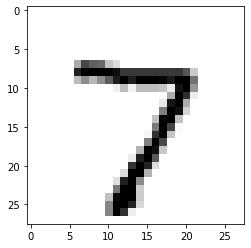

In [55]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [7.29926905e-05 1.92670706e-11 2.16439986e-08 1.48181525e-05
 1.69077452e-07 5.21529391e-02 9.47748482e-01 1.98546509e-11
 1.04199889e-05 1.52530987e-07]
라벨: 5, 예측결과: 6


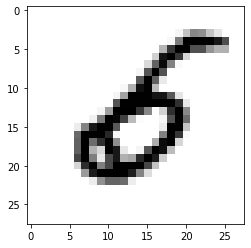

예측확률분포: [6.0332234e-12 5.2879666e-05 3.3466512e-01 5.4612803e-05 9.0437666e-09
 4.6243755e-09 8.4951176e-13 6.6522723e-01 7.7020985e-08 7.5074880e-08]
라벨: 2, 예측결과: 7


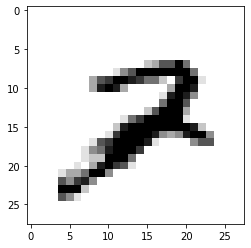

예측확률분포: [7.29926905e-05 1.92670706e-11 2.16439986e-08 1.48181525e-05
 1.69077452e-07 5.21529391e-02 9.47748482e-01 1.98546509e-11
 1.04199889e-05 1.52530987e-07]
라벨: 5, 예측결과: 6


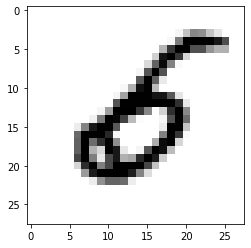

예측확률분포: [8.5220810e-05 2.1490756e-09 5.7955928e-02 2.1197870e-02 1.4398232e-11
 1.2566635e-06 1.0332586e-08 4.6045709e-04 9.2029929e-01 4.4899409e-08]
라벨: 3, 예측결과: 8


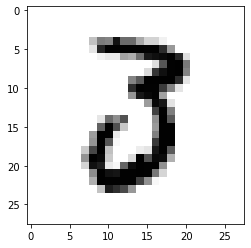

예측확률분포: [5.4847313e-09 5.7920483e-05 5.1718754e-01 7.5342716e-03 5.0371347e-09
 3.6405272e-09 8.9589456e-09 2.2766189e-06 4.7521797e-01 6.4048503e-11]
라벨: 8, 예측결과: 2


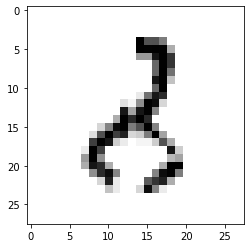

In [56]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [57]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               